# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 150, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,16225,1825,1765,853,170,1067
2,16448,6243,6360,824,2662,2005


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
- Sample 1: Fresh foods, grocery, detergents_paper, and delicatessen expenditure is close to average. Milk products expenditure is much greater than average. This indicates that the establishment should be similar to a cafe, where milk expenditure is high as the main product being offered is coffee, while groceries, fresh foods, and delicatessen are required for supplying/making cake, cookies, and other accompaniments.  
- Sample 2: Fresh foods expenditure is much greater than average, whereas milk, grocery, detergents paper expenditures are much smaller than average. Delicatessen expenditure is also below average, but not by as large a margin. These facts indicate that this place can be categorized as a fresh foods market.
- Sample 3: Fresh foods and delicatessen expenditure is much greater than average, and milk products expenditure is slightly above average. Grocery and detergents paper expenditure is close to average. These facts indicate that this place can be roughly categorized as a deli.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [23]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis = 1)
print(new_data)
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size = 0.25, random_state = 3)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

     Fresh   Milk  Grocery  Frozen  Detergents_Paper
0    12669   9656     7561     214              2674
1     7057   9810     9568    1762              3293
2     6353   8808     7684    2405              3516
3    13265   1196     4221    6404               507
4    22615   5410     7198    3915              1777
5     9413   8259     5126     666              1795
6    12126   3199     6975     480              3140
7     7579   4956     9426    1669              3321
8     5963   3648     6192     425              1716
9     6006  11093    18881    1159              7425
10    3366   5403    12974    4400              5977
11   13146   1124     4523    1420               549
12   31714  12319    11757     287              3881
13   21217   6208    14982    3095              6707
14   24653   9465    12091     294              5058
15   10253   1114     3821     397               964
16    1020   8816    12121     134              4508
17    5876   6157     2933     839            

-0.5311837232518248

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I attempted to predict the Detergents_Paper feature from the other features. The R^2 score for the Decision Tree Regressor that was used for this task was negative, implying that none of the variance in the values of Delicatessen was explained by our model. Thus the expenditure made by a consumer on other categories of products has little consequence on their expenditure on deli products.  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

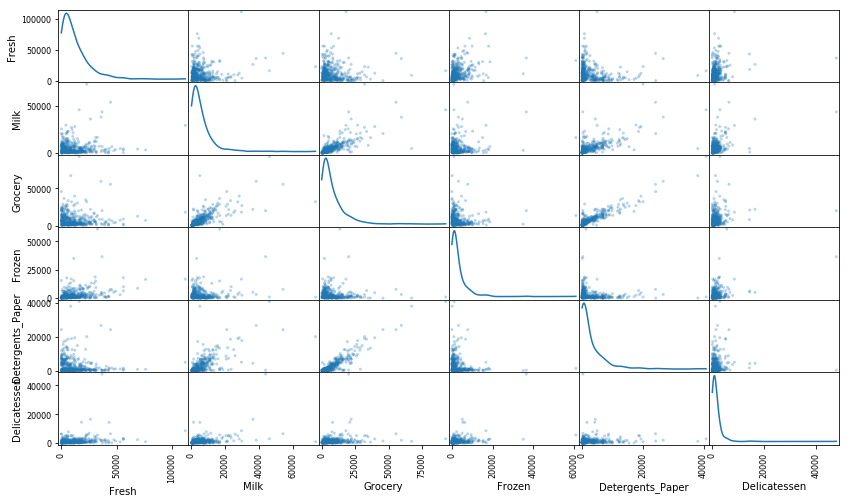

In [12]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

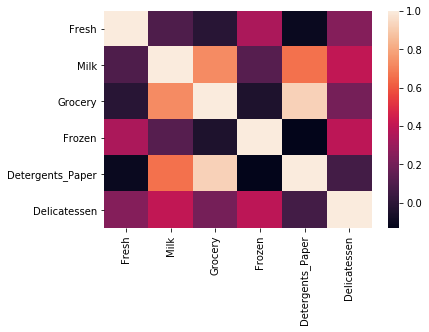

In [16]:
from seaborn import heatmap
heatmap(data.corr())

**Answer:**
- From all the graphs in the scatter matrix, it is clear that most points in every graph lie close to (0,0). This means that the expenditure made in every category has generally small values compared to some of the values in the dataset which are very large. This is also clear if one compares the mean and standard deviation in every category respectively. The standard deviation is larger than the mean in every case, implying that in every case most values lie close to 0 and there are some very large outliers that offset the central tendency of the category to a larger value, leading to a very large standard deviation. Many of the scatterplots seem to follow a normal distribution, except for the ones that have high correlation values in the heatmap. This makes sense; normal data distributions represent low correlation between the two variables. However, the variables Detergents_Paper and Grocery have scatterplots that look like linear graphs. The case of Detergents_Paper and Milk is similar, although there is a point density peak at the start which looks similar to the peak of a Gaussian distribution. These rough inferences are further solidified if we take a look at the corresponding heatmap blocks - grocery and detergents_paper have a correlation value higher than 0.8, so a normal distribution is almost completely absent, and detergents_paper and milk have a correlation value of around 0.6, which is reflected in how a linear distribution seems to exist but there is also a slight semblance of a normal distribution at the beginning of the graph. Furthermore, when we bring the means and standard deviations into the picture, we understand that the variables milk and detergents_paper have a distribution such as they do because the larger values (discussed earlier) are no longer outliers, but constitute the linearity of the distribution, and the smaller values have a peak that is similar to a normal distribution. 
- As specified earlier, detergents_paper shows good correlation with grocery and milk. Furthermore, milk and grocery also seem to show a good degree of correlation (close to 0.8)
- This confirms my previous suspicions that delicatessen is not a relevant feature for drawing inferences. This can be seen both from the heatmap, where no correlation value of delicatessen with another variable exceeds 0.4, and from the scatter matrix where every plot of delicatessen with other features seems to have a normal distribution (with a low peak and outliers that seem to be increasing linearly for milk and frozen, both of which have the highest correlation values amongst all)
- The data in general seems to constitute a superpostion of a Gaussian distribution with small values of average and standard deviation, and some larger values that seem to be increasing linearly. In cases where the number of points following the latter behaviour is small, these points appear as outliers and the distribution shows little correlation between the two features. In distributions where the latter behaviour dominates (such as detergents_paper - grocery), the scatter plot appears as a linear graph with large point density around the origin. Depending on where a scatter plot lies on the spectrum between these two extremes, we find corresponding correlation values (large or small).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

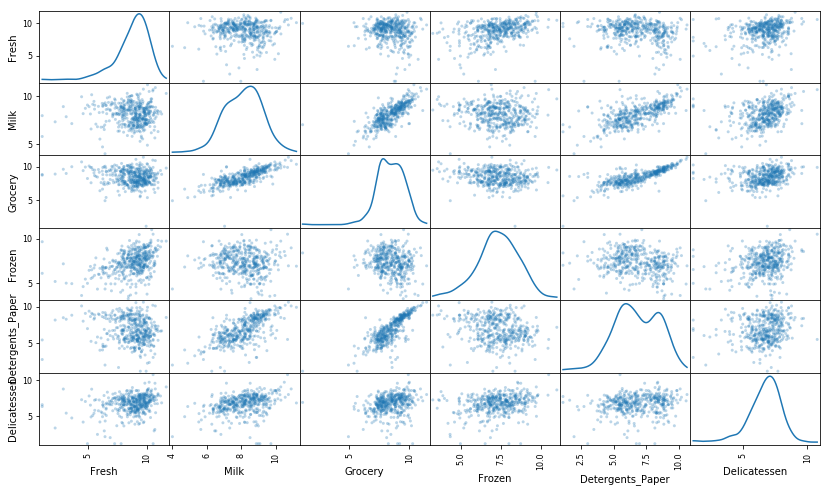

In [25]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [26]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.694309,7.509335,7.475906,6.748760,5.135798,6.972606
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [40]:
# For each feature find the data points with extreme high or low values

outliers_dict = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3 - Q1
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_dict.update({feature : log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]})
    
# OPTIONAL: Select the indices for data points you wish to remove
indices = []
for feature in outliers_dict:
    for index in outliers_dict[feature].index:
        indices.append(index)

from collections import Counter
counter = Counter(indices)
outliers  = [154, 97, 128, 184, 412, 183, 356]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
53,6.196444,9.256556,9.352881,6.612041,8.632484,5.411646
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
159,5.872118,8.949495,9.594378,5.986452,8.996776,5.713733


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
275,6.522093,7.383989,5.407172,6.759255,4.564348,5.937536
333,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
59,8.722091,8.586719,8.992184,4.859812,8.033983,7.379632
60,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
93,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
103,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
106,7.282074,8.754161,9.278373,4.890349,8.829080,7.512618


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
402,10.186371,8.466531,8.535230,5.393628,2.302585,5.828946


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
44,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
71,9.814164,7.143618,9.954276,8.589142,8.336390,9.579971
87,10.675099,8.522181,9.001716,8.750208,7.364547,9.571575
88,8.970051,6.295266,8.304495,9.183483,5.105945,3.828641
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
In addition to the preset code, I have created a counter variable to count how many times points occur in the lists of outliers: 

In [41]:
print(counter)

Counter({154: 5, 97: 3, 128: 3, 184: 3, 412: 3, 183: 3, 356: 3, 65: 2, 66: 2, 96: 2, 98: 2, 181: 2, 338: 2, 357: 2, 23: 2, 47: 2, 61: 2, 85: 2, 122: 2, 191: 2, 289: 2, 75: 2, 161: 2, 333: 2, 439: 2, 53: 1, 81: 1, 95: 1, 159: 1, 170: 1, 171: 1, 173: 1, 174: 1, 193: 1, 218: 1, 266: 1, 272: 1, 299: 1, 304: 1, 305: 1, 327: 1, 340: 1, 342: 1, 353: 1, 355: 1, 392: 1, 86: 1, 269: 1, 131: 1, 275: 1, 16: 1, 38: 1, 57: 1, 59: 1, 60: 1, 93: 1, 103: 1, 106: 1, 138: 1, 144: 1, 145: 1, 175: 1, 196: 1, 221: 1, 264: 1, 325: 1, 379: 1, 403: 1, 413: 1, 418: 1, 420: 1, 429: 1, 204: 1, 402: 1, 25: 1, 42: 1, 43: 1, 44: 1, 71: 1, 87: 1, 88: 1, 109: 1, 137: 1, 142: 1, 187: 1, 190: 1, 203: 1, 233: 1, 270: 1, 285: 1, 303: 1, 318: 1, 343: 1, 375: 1})


- This shows us the frequency of occurency of any given index in all the lists of outliers (provided the index appears atleast once). We can see that index 154 appears 5 times as an outlier, while many other points appear 3 times, 2 times, and 1 time in these lists.
- I think any point that appears as an outlier for three or more features should be removed from the dataset as these points essentially behave as noise and can hinder the performance of algorithms sensitive to noise (such as k-means clustering). Such behaviour is probably representative of much larger clients (such as a large wholesale retailer), and such points should be treated separately and not clustered with the rest of our data points.
- As specified earlier, points that appear as outliers for 3 or more features definitely behave as noise in our dataset. Therefore these points have been removed as they hinder the performance of noise sensitive algorithms such as k-means. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

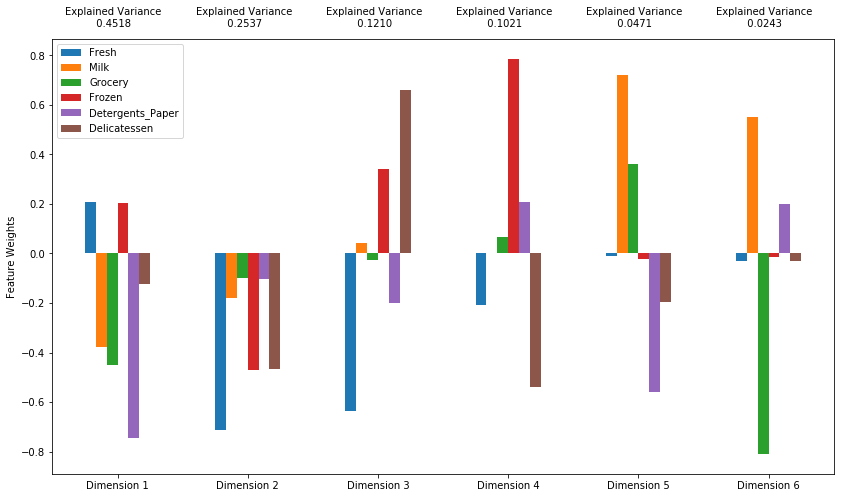

In [82]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state = 3).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- The first and second principal component together account for **70.55%** of variance in the data, which is a pretty good number. 
- The first four components together account for **92.86%** of variance in our dataset.
- a) Dimension 1: <br>This dimension accounts for the highest amount of variance amongst all the principal dimensions obtained by a large margin (0.4518). This dimension relies heavily on the features milk, grocery, and detergents_paper. As seen earlier, these three dimensions have the highest correlation values and therefore it is not surprising that a linear combination of these dimensions accounts for so much of the variance in our dataset. These three features account for a lot of the negative variance in this dimension, as there weights are largest in terms of absolute value and all three weights are negative. <br>b) Dimension 2: This dimension also accounts for a large portion of the variance (0.2537). This dimension represents the features fresh, frozen, and delicatessen very well. As all three weights are negative, all three account for a lot of negative variance in this dimension. <br>c) Dimension 3: This dimension accounts for a significant amount of variance as well (12.1%). The significant features in this dimension are fresh, frozen, and delicatessen; detergents paper is also somewhat significant. The feature fresh accounts for a lot of the negative variance in this dimension as its weight is a large negative value, while delicatessen and frozen account for a lot of the positive variance. <br>d) Dimension 4: This dimension also accounts for a significant amount of variance in the data (10.21%). This dimension is heavily influenced by the feature Frozen, and this feature accounts for most of the positive variance in this dimension. The second most influential feature in this dimension is delicatessen, which accounts for most of the negative variance in this dimension. The features fresh and detergents_paper are roughly equally important, however the former accounts for negative variance and the latter accounts for positive variance. Thus any increase in this dimension leads to roughly equal decrease in fresh and increase in delicatessen, and effectively the two negate each other. <br>e) Dimension 5: This dimension does not account for a significant amount of variance in our data (4.71%). Thus it can be safely ignored without losing too much information about our data. Milk accounts for most of the positive variance in this dimension while detergents_paper accounts for most of the negative variance in this dimension. <br>f) Dimension 6: This dimension accounts for merely 2.43% of variance in our dataset and is therefore very safe to ignore. The important features affecting this dimension are grocery, milk, and detergent_paper, in decreasing order of importance. Grocery accounts for most of the negative variance, while milk and detergents_paper account for most of the positive variance in this dimension.
<br><br>
In terms of customer spending the 
- first dimension shows a very negative effect of milk, grocery, and detergents_paper on this dimension; thus this dimension characterises expenditure that in general avoids these features and favours expenditure on fresh and frozen products. This is probably the kind of expenditure a wholesale retailer would make, and thus this dimension describes a latent feature which denotes something like products for the wholesale market.
- second dimension also shows a negative effect of the aforementioned three dimensions, but a much greater negative effect of the other three dimensions. Thus for customer spending, this dimension denotes the tendency of the consumer to avoid expenditure, and much more so in the following three categories of products: fresh, frozen, and delicatessen.
- third dimension shows a very negative effect of fresh products on this dimension, but a very positive effect of frozen and delicatessen products on this dimension. Therefore an increase in this dimension denotes decreased expenditure towards fresh and increased expenditure frozen and delicatessen. This is indicative of the tendency of the consumer to buy processed foods, and denotes a latent feature to that effect. 
- fourth dimension is effected very positively by frozen and detergents_paper, while being negatively effected by delicatessen and fresh. This denotes the tendency of the consumer to buy frozen and detergents_paper products, while avoiding delicatessen and fresh products.

###### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [46]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7239,-0.1445,-0.9583,-1.6903,0.2556,0.3967
1,1.9746,-0.1431,-0.2767,-1.2007,0.0844,0.0839
2,-1.1972,-1.0578,-0.4083,-0.9159,-0.2302,0.2554


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [83]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(random_state = 3, n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [84]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7239,-0.1445
1,1.9746,-0.1431
2,-1.1972,-1.0578


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

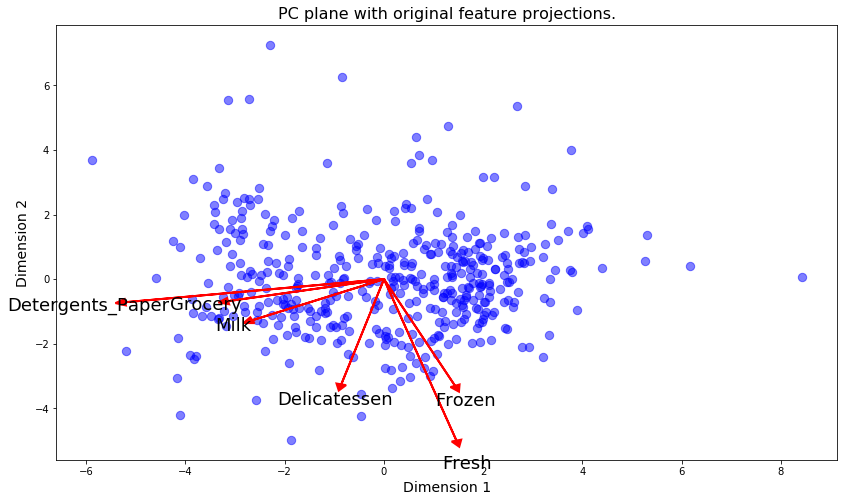

In [85]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Answer: Detergents_Paper is most strongly correlated with the first dimension, while Fresh is most strongly associated with the second dimension. These observations do agree with the pca_results plot from earlier

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
The K-Means clustering algorithm has the following advantages:<br>
- Scales well to large datasets
- Widely applicable general purpose algorithm
- Works well in datasets which have circular distributions around centroids, which covers the majority of clustering applications if feature scaling is applied
- Being a hard clustering algorithm, works well when dealing with data containing well defined clusters (provided noise is dealt with beforehand)
<br><br>
The Gaussian Mixture Model clustering algorithm has the following advantages:
- Works well with many real-life datasets, as much of real-life data follows a Gaussian distribution.
- Works well with datasets where clusters aren't as concrete, and therefore the assignment of points to clusters is better done using probabilstic modelling rather than deterministic modelling (advantage of soft clustering)
- Is better suited to handle more elliptical data distributions than K-Means.
<br><br>
Many of the feature relations are Gaussian distributions, which is evident from the scatter matrix plotted earlier, therefore a Gaussian Mixture Model seems to be a good choice for a clustering algorithm for this problem.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [86]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score as sscore

for i in range(2,20):
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components =i, random_state = 3).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)          

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = sscore(reduced_data, preds, random_state = 3)
    print(score)
    
    
clusterer = GaussianMixture(n_components = 2, random_state = 3).fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_

0.4255227710318025
0.40261104251814434
0.3035379616267558
0.2500824259786055
0.31301539447430765
0.3279071109932212
0.3300530897025148
0.33108955691133635
0.3135553134968462
0.3315710404337213
0.3368737264638547
0.33779936877592004
0.3243316129477679
0.3064409944006199
0.28700808400547473
0.30093974486696473
0.2947584557678098
0.28945831102747155


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The several silhouette scores can be seen above. The highest silhouette score is for n_components = 2, that is for a Gaussian Mixture Model with 2 centers.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

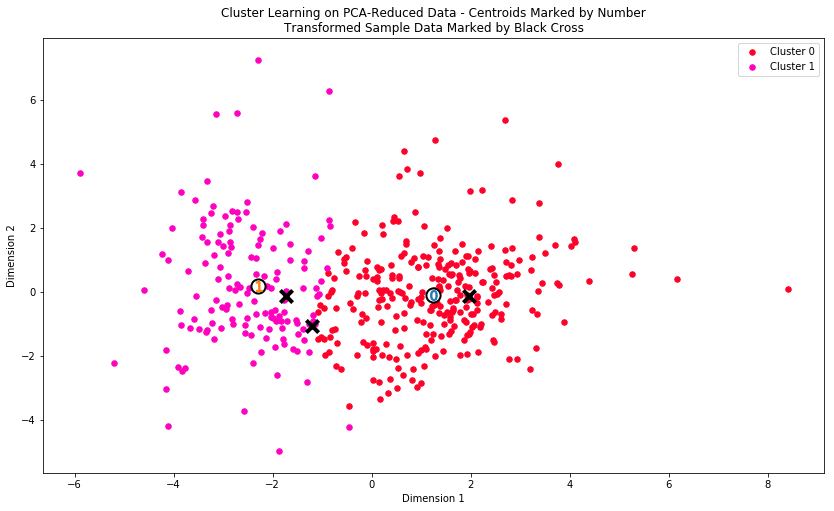

In [74]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [75]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8865.0,2185.0,2728.0,2037.0,367.0,733.0
Segment 1,3461.0,7874.0,12891.0,865.0,4923.0,988.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
- Segment 0: All feature values are below the mean values of the original dataset, but this difference is less in fresh and frozen. Therefore these are customers who prefer to spend less then average, but spend more on fresh and frozen than what they do on other kinds of products. Therefore these customers are probably cafes (mostly small cafes, but some are also large which is evident from the large distribution in the values in the dataset).
- Segment 1: Consumers in this segment spend more on milk, grocery, and detergents_paper than the average consumer, while their expenditure in all other categories is less than the average for consumers. These customers are probably retailers.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [78]:
# Display the predictions
print(samples)
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1  16225  1825     1765     853               170          1067
2  16448  6243     6360     824              2662          2005
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
- Sample points 0 and 2 have values higher than average in Milk, Grocery, and relatively larger values in detergents_paper. We have already seen that these three features are very statistically significant and highly correlated. Therefore these points should be  markets (segment 1). Sample point 1 has small feature values in general while it has a larger than average value of fresh. Thus it should be a cafe (segment 0)
- Sample points 0 and 2 are small markets and sample point 1 is a cafe, which matches the discussion from question 8 as well.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Retailers would not be affected by this policy shift as most of what they're selling are products that have a life span, and therefore they can buy them in bulk instead for cheaper wholesale prices. Thus these customers would respond positively to the policy shift. Cafes, on the other hand, deal in consumables and cannot hoard what they buy from distributors. Thus they would lose supply of their product and therefore lose business, meaning that they would probably react very negatively to this policy shift. Therefore this policy shift should be put into place only for retailers, and not for cafes. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
A supervised classification algorithm should be used to classify which customer segment the customer belongs to (where segment 1 represents markets and segment 0 represents cafes). This model would take good_data and its predicted labels is input for training, testing, and cross-validation. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

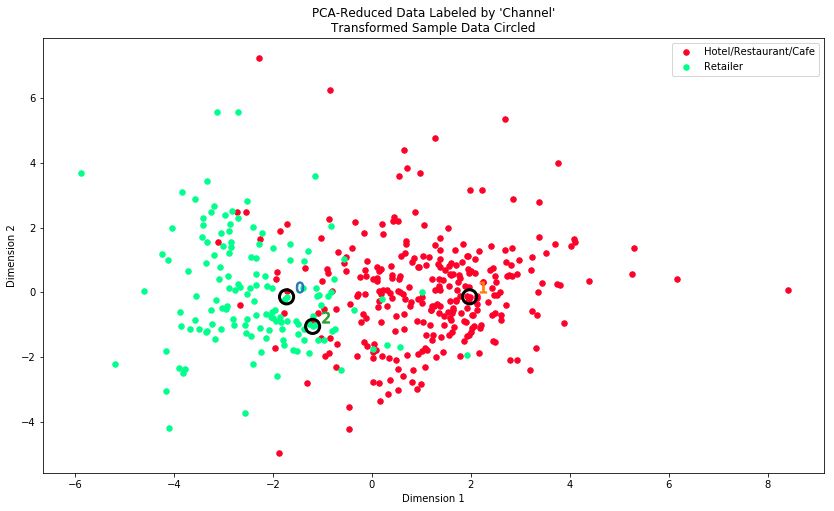

In [80]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- The clustering algorithm performs really well, and except for the fact that the cluster HoReCa is larger and has many points close to the center of the Retailer cluster, reflects the same information that the original classification does.
- Customers close to the bottom left are likelier to be retailers, while customers close to the top right are likelier to be Hotels/Restaurants/Cafes. As we get closer to the boundary between the two clusters, the soft clustering approach makes more sense and our pure classification has to be replaced by other less deterministic descriptions.
- Yes, these classifications are consistent with my previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.